<a href="https://colab.research.google.com/github/prof-Anurag/Multiple-Disease-Prediction-System/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

*Data Collection and Analysis*

In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Represent Non-Diabetic.

1 --> Represent Diabetic.

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Separating Features and Target.

In [ ]:
x = diabetes_dataset.drop(columns = 'Outcome' , axis = 1)
y = diabetes_dataset['Outcome']

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


## ***Data Standardization***

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
standarized_data = scaler.transform(x)

In [ ]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
x = standarized_data
y = diabetes_dataset['Outcome']

Splitting the dataset into Training and Testing Data.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2)

In [ ]:
x.shape,x_train.shape,x_test.shape

((768, 8), (537, 8), (231, 8))

Training the model.

In [ ]:
 classifier = svm.SVC(kernel='linear')  # LogisticRegression() # KNeighborsClassifier(n_neighbors=5) # RandomForestClassifier()

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Evaluation of the model.

In [ ]:
# Finding the accuracy score on training data.
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print("Accuracy on Training Data : ",training_data_accuracy)

Accuracy on Training Data :  0.7821229050279329


In [ ]:
# Finding the accuracy score on Testing Data.
x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy on Testing Data : ",testing_data_accuracy)

Accuracy on Testing Data :  0.7748917748917749


Confusion Matrics

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

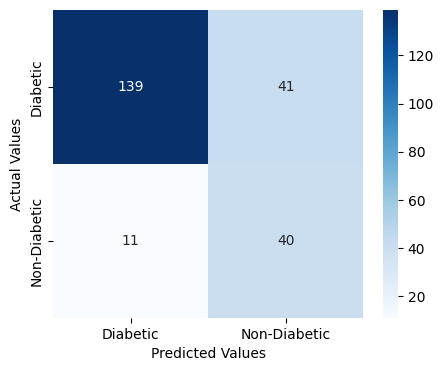

In [ ]:
cm = confusion_matrix(x_test_prediction,y_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Diabetic','Non-Diabetic'],
            yticklabels=['Diabetic','Non-Diabetic'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Making The Predictive System

In [ ]:
input_data = (6,148,72,35,0,33.6,0.627,50)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the model.

In [ ]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [ ]:
# Loading the saved model.
loaded_model = pickle.load(open('diabetes_model.sav','rb'))

In [ ]:
input_data = (1,89,66,23,94,28.1,0.167,21)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = loaded_model.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **END**